# IMAGE RECOGNITION USING CONVOLUTIONAL NEURAL NETWORK

In [ ]:
#Mengimport Library 
import tensorflow as tf


2.5.0


DATA 

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rock_paper_scissors.zip

--2021-06-05 08:06:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  20.8MB/s    in 15s     

2021-06-05 08:06:21 (19.9 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [ ]:
#ekstraksi file zip
import zipfile,os
import shutil
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_direct = '/tmp/rockpaperscissors'

#Menghapus folder 'rps-cv-images' agar class yang terderteksi hanya ada 3 class 
shutil.rmtree(os.path.join(base_direct,'rps-cv-images')) 


train_dir = os.path.join(base_direct, 'train')
validation_dir = os.path.join(base_direct, 'val')

SPLIT DATA SET

In [ ]:
img_height, img_width = 150, 150,
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
dataset = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    validation_split=0.4) 
train_set = dataset.flow_from_directory(
                    base_direct,
                    target_size=(img_height, img_width),
                    color_mode='rgb',
                    class_mode='categorical',
                    subset='training')
validation_set = dataset.flow_from_directory(
                    base_direct,
                    color_mode='rgb',
                    target_size=(img_height, img_width),
                    class_mode='categorical', 
                    subset='validation')
#menggunakan categorical karena terdapat 3 class (lebih dari 2) yang akan diklasifikasikan 

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


CNN LAYERS

In [ ]:
#Membangun model CNN dengan empat layer convolusi 
model = tf.keras.models.Sequential([
    #Layer Convolusi pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    #Layer Convolusi kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Layer Convolusi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Layer Convolusi keempat
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #Menggunakan activation softmax untuk menghasilkan probabilitas untuk setiap kelas (3 class)
])


In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])

TRAINING PROCESS

In [ ]:
# melatih data 
model.fit(train_set, batch_size=20, epochs=10, verbose=1, validation_data=validation_set)

Epoch 1/10
42/42 [==============================] - 86s 2s/step - loss: 0.8862 - acc: 0.5495 - val_loss: 0.5007 - val_acc: 0.8227
Epoch 2/10
42/42 [==============================] - 84s 2s/step - loss: 0.3428 - acc: 0.8790 - val_loss: 0.2769 - val_acc: 0.9073
Epoch 3/10
42/42 [==============================] - 84s 2s/step - loss: 0.2197 - acc: 0.9193 - val_loss: 0.3616 - val_acc: 0.8947
Epoch 4/10
42/42 [==============================] - 84s 2s/step - loss: 0.2014 - acc: 0.9285 - val_loss: 0.1562 - val_acc: 0.9519
Epoch 5/10
42/42 [==============================] - 84s 2s/step - loss: 0.1613 - acc: 0.9452 - val_loss: 0.1666 - val_acc: 0.9439
Epoch 6/10
42/42 [==============================] - 84s 2s/step - loss: 0.1389 - acc: 0.9536 - val_loss: 0.1248 - val_acc: 0.9622
Epoch 7/10
42/42 [==============================] - 83s 2s/step - loss: 0.2401 - acc: 0.9117 - val_loss: 0.1442 - val_acc: 0.9497
Epoch 8/10
42/42 [==============================] - 84s 2s/step - loss: 0.1017 - acc: 0.96

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PREDICTING PROCESS

/content/test-5.jpg
scissors


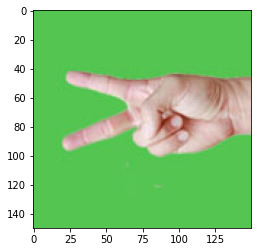

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# gambar yang akan digunakan untuk data test
fn = '/content/test-5.jpg'
 
# Memprediksi gambar
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images)
label_class = classes.argmax(axis=-1)
  
print(fn)
if label_class==0:
  print('paper')
elif label_class==1:
  print('rock')
elif label_class==2: 
  print('scissors')
